<a href="https://colab.research.google.com/github/amrahmani/Machine-Learning/blob/main/Ch1_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem: Data Preprocessing Tasks**

**Task 1:** Use the following dataset containing information about customers (e.g., Customer ID, Gender, Age, Annual Income (k$), Score (1-100)).

https://github.com/amrahmani/Machine-Learning/blob/main/customers.csv

**Task 2: Handling Missing Values**

***Steps***:
Identify Missing Values: Load the dataset and identify which columns contain missing values and how many missing values each column has.

Remove Rows/Columns: Remove rows or columns with a high percentage of missing values (e.g., more than 50% missing).

Impute Missing Values: Impute missing values in numerical columns using the mean or median and categorical columns using the mode.

Visualize Missing Data: Create visualizations (e.g., heatmap) to show the distribution of missing values before and after cleaning.

Save Cleaned Data: Save the cleaned dataset to a new CSV file.


**Task 3: Encoding Categorical Variables**

***Steps:***
Label Encoding: Apply label encoding to categorical features with a small number of unique values.

One-Hot Encoding: Apply one-hot encoding to categorical features with a larger number of unique values.

Comparison: Compare the dataset before and after encoding to understand the changes.

Save Encoded Data: Save the encoded dataset to a new CSV file.

**Task 4: Feature Scaling**

***Steps:*** Min-Max Scaling: Scale the numerical features to a range of [0, 1] using MinMaxScaler.

Standard Scaling: Scale the numerical features to have a mean of 0 and a standard deviation of 1 using StandardScaler.

Comparison: Compare the distributions of the original, standard-scaled, and min-max-scaled features using histograms.

Save Scaled Data: Save the scaled datasets to new CSV files.

**Task 5: Remove Outliers**

***Steps:*** Identify Outliers: Use statistical methods (e.g., IQR, Z-score) or visualization tools (e.g., box plots) to identify outliers in the numerical features.

Remove Outliers: Apply the methods to remove or treat the identified outliers:

IQR Method: Remove data points outside 1.5 times the interquartile range (IQR).

Z-score Method: Remove data points with a Z-score above a certain threshold (e.g., 2).

Comparison: Compare the distributions of the original and outlier-removed features using histograms or box plots.

Save Cleaned Data: Save the dataset with outliers removed to a new CSV file.


**Step 1: Load the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

url = 'https://raw.githubusercontent.com/amrahmani/Machine-Learning/main/customers.csv'

# Read the CSV file into a Pandas DataFrame
# A DataFrame in Pandas is a two-dimensional, labeled data structure with columns of potentially different types.
customers = pd.read_csv(url)

# This code imports a CSV file without a header row and creates a DataFrame with the specified column names.
# customers = pd.read_csv(url, header=None, names=["Customer ID",	"Gender",	"Age",	"Annual Income (k$)",	"Score (1-100)"])  # Adjust header row if needed

print(customers) # Display the first few rows of the dataset
print("\nCustomrs Information")
print(customers.info())

     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0              1    Male   39                63.0           14.0
1              2  Female   35                51.0           59.0
2              3    Male   39                61.0           56.0
3              4    Male   18                54.0            7.0
4              5    Male   36                62.0            3.0
..           ...     ...  ...                 ...            ...
195          196  Female   24                25.0           51.0
196          197  Female   50                37.0           72.0
197          198  Female   38                81.0           42.0
198          199    Male   28                85.0           64.0
199          200    Male   43                56.0           15.0

[200 rows x 5 columns]

Customrs Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------          

**Step 2: Identify Missing Values**


In [2]:
# Identify missing values
missing_values = customers.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

Missing values before imputation:
Customer ID            0
Gender                 6
Age                    0
Annual Income (k$)    15
Score (1-100)          6
dtype: int64


**Step 2-1: Remove Rows or Columns with High Percentage of Missing Values**

In [3]:
# Remove rows with more than 50% missing values
# customers.shape[1] gets the number of columns in the DataFrame
customers_removed = customers.dropna(thresh=customers.shape[1] * 0.5)

# Show rows affected by removal
removed_rows = customers[~customers.index.isin(customers_removed.index)]
print("Rows removed due to high percentage of missing values:")
print(removed_rows)

print("Customer information after removal:")
customers_removed.info()

Rows removed due to high percentage of missing values:
     Customer ID Gender  Age  Annual Income (k$)  Score (1-100)
34            35    NaN   19                 NaN            NaN
94            95    NaN   29                 NaN            NaN
110          111    NaN   43                 NaN            NaN
112          113    NaN   30                 NaN            NaN
117          118    NaN   26                 NaN            NaN
154          155    NaN   31                 NaN            NaN
Customer information after removal:
<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         194 non-null    int64  
 1   Gender              194 non-null    object 
 2   Age                 194 non-null    int64  
 3   Annual Income (k$)  185 non-null    float64
 4   Score (1-100)       194 non-null    float64
dtypes: float64(2),

**Step 2-2: Impute Missing Values with Mean Value**

In [ ]:
# Impute missing values with the mean value
customers_imputed = customers_removed.copy()

# Convert 'Annual Income (k$)' to numeric, handling errors
# errors='coerce' tells to convert non-numeric values (like strings or missing values) to NaN (Not a Number). This prevents errors during the conversion process.
customers_imputed['Annual Income (k$)'] = pd.to_numeric(customers_imputed['Annual Income (k$)'], errors='coerce')
# Convert 'Score (1-100)' to numeric, handling errors
customers_imputed['Score (1-100)'] = pd.to_numeric(customers_imputed['Score (1-100)'], errors='coerce') # Convert 'Score' column to numeric

mean_income = customers_imputed['Annual Income (k$)'].mean()
mean_score = customers_imputed['Score (1-100)'].mean()

# Show rows with missing values before imputation, axis=1 means a column
missing_before = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values before imputation:")
print(missing_before)

# Impute missing values
customers_imputed['Annual Income (k$)'].fillna(mean_income, inplace=True)
customers_imputed['Score (1-100)'].fillna(mean_score, inplace=True)

# Show rows with missing values after imputation
missing_after = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values after imputation:")
print(missing_after)
print("Customer information after imputation:")
customers_imputed.info()

Rows with missing values before imputation:
     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
5              6  Female   42                 NaN          196.0
89            90  Female   42                 NaN           70.0
96            97  Female   37                 NaN           12.0
107          108  Female   43                 NaN            3.0
119          120    Male   42                 NaN            2.0
151          152    Male   27                 NaN           93.0
178          179    Male   23                 NaN           23.0
180          181    Male   51                 NaN           15.0
191          192    Male   24                 NaN           70.0
Rows with missing values after imputation:
Empty DataFrame
Columns: [Customer ID, Gender, Age, Annual Income (k$), Score (1-100)]
Index: []
Customer information after imputation:
<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non

**Step 2-3: Save the cleaned dataset to a new CSV file**

In [ ]:
# Save the cleaned dataset to a CSV file
customers_imputed.to_csv('customers_cleaned.csv', index=False) # Set index=False to avoid including the index in the CSV file
# Download the created CSV file
files.download('customers_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 2-4: Visualize Missing Data**

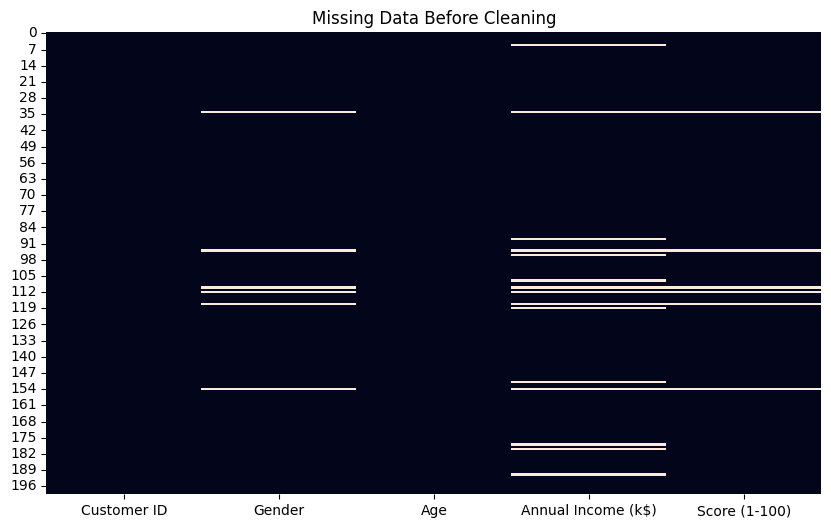

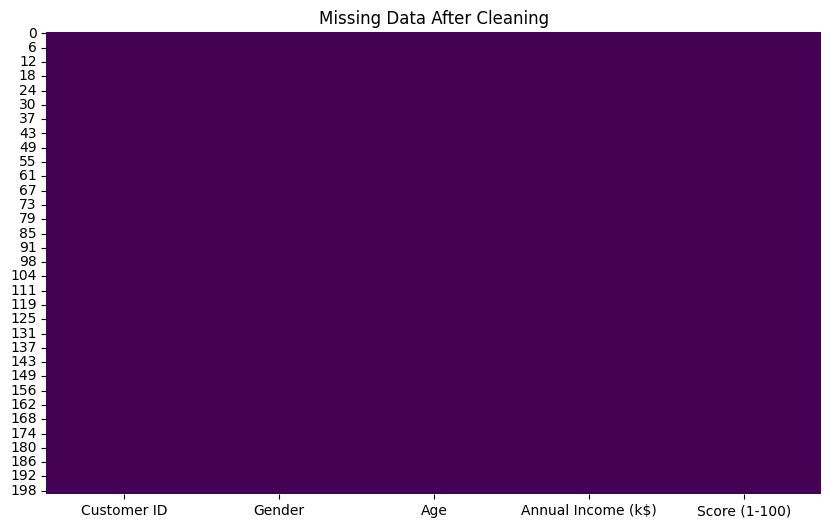

In [ ]:
# Visualize missing data before cleaning
# This line creates a new Matplotlib figure with a specified size of 10 inches in width and 6 inches in height
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False)
plt.title('Missing Data Before Cleaning')
plt.show()

# Visualize missing data after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers_imputed.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Cleaning')
plt.show()


**Step 3: Identify Categorical Columns and Apply Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Step 1: Label Encoding for 'Gender' column
# The LabelEncoder assigns numerical labels based on the alphabetical order of the categories by default.
label_encoder = LabelEncoder()
customers_encoded = customers_imputed.copy() # Create a copy of the DataFrame
customers_encoded['Gender'] = label_encoder.fit_transform(customers_encoded['Gender'])

print("\nDataset after Label Encoding:\n", customers_encoded.head())

# Step 2: One-Hot Encoding (if needed, here we don't have other categorical features for one-hot encoding)
# If there were additional categorical columns with many unique values, we would apply one-hot encoding here.

# Step 3: Comparison
# No one-hot encoding applied, so only Label Encoding comparison
print("\nComparison of 'Gender' column before and after encoding:")
print(customers_encoded.head())

# Step 4: Save the encoded dataset to a new CSV file
# index=False tells Pandas to not include the DataFrame's index (row labels) in the CSV file.
customers_encoded.to_csv('customers_encoded.csv', index=False)

print("\nEncoded dataset saved to 'customers_encoded.csv'")
files.download('customers_encoded.csv')

print("Customer information after label encoding:")
customers_encoded.info()


Dataset after Label Encoding:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0            1       1   39                63.0           14.0
1            2       0   35                51.0           59.0
2            3       1   39                61.0           56.0
3            4       1   18                54.0            7.0
4            5       1   36                62.0            3.0

Comparison of 'Gender' column before and after encoding:
   Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0            1       1   39                63.0           14.0
1            2       0   35                51.0           59.0
2            3       1   39                61.0           56.0
3            4       1   18                54.0            7.0
4            5       1   36                62.0            3.0

Encoded dataset saved to 'customers_encoded.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Customer information after label encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         194 non-null    int64  
 1   Gender              194 non-null    int64  
 2   Age                 194 non-null    int64  
 3   Annual Income (k$)  194 non-null    float64
 4   Score (1-100)       194 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 9.1 KB


**Step 4: Common Feature Scaling Techniques**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Separate the features for scaling, EXCLUDING the header
features = customers_encoded[['Annual Income (k$)', 'Score (1-100)']].values

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
features_min_max_scaled = min_max_scaler.fit_transform(features)
customers_min_max_scaled = customers_encoded.copy()
customers_min_max_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_min_max_scaled

# Standardization
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
customers_standard_scaled = customers_encoded.copy()
customers_standard_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_standard_scaled

# Robust Scaling
robust_scaler = RobustScaler()
features_robust_scaled = robust_scaler.fit_transform(features)
customers_robust_scaled = customers_encoded.copy()
customers_robust_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_robust_scaled

# MaxAbs Scaling
max_abs_scaler = MaxAbsScaler()
features_max_abs_scaled = max_abs_scaler.fit_transform(features)
customers_max_abs_scaled = customers_encoded.copy()
customers_max_abs_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_max_abs_scaled

# Display the scaled datasets
print("Original Dataset:\n", customers.head())
print("\nMin-Max Scaled Dataset:\n", customers_min_max_scaled.head())
print("\nStandardized Dataset:\n", customers_standard_scaled.head())
print("\nRobust Scaled Dataset:\n", customers_robust_scaled.head())
print("\nMaxAbs Scaled Dataset:\n", customers_max_abs_scaled.head())

# Save the encoded datasets to new CSV files
customers_min_max_scaled.to_csv('min_max_scaled_customers.csv', index=False)
customers_standard_scaled.to_csv('standard_scaled_customers.csv', index=False)
customers_robust_scaled.to_csv('robust_scaled_customers.csv', index=False)
customers_max_abs_scaled.to_csv('max_abs_scaled_customers.csv', index=False)

print("\nScaled datasets saved to CSV files.")

Original Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
1            1    Male   39                63.0           14.0
2            2  Female   35                51.0           59.0
3            3    Male   39                61.0           56.0
4            4    Male   18                54.0            7.0

Min-Max Scaled Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age            0.193015       0.261195
1            1       2   39            0.173516       0.066667
2            2       0   35            0.118721       0.297436
3            3       2   39            0.164384       0.282051
4            4       2   18            0.132420       0.030769

Standardized Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age            0.000000       0.000000
1            1       2   39           -0.129380  

**Step 4-1: Plotting the scaled datasets**


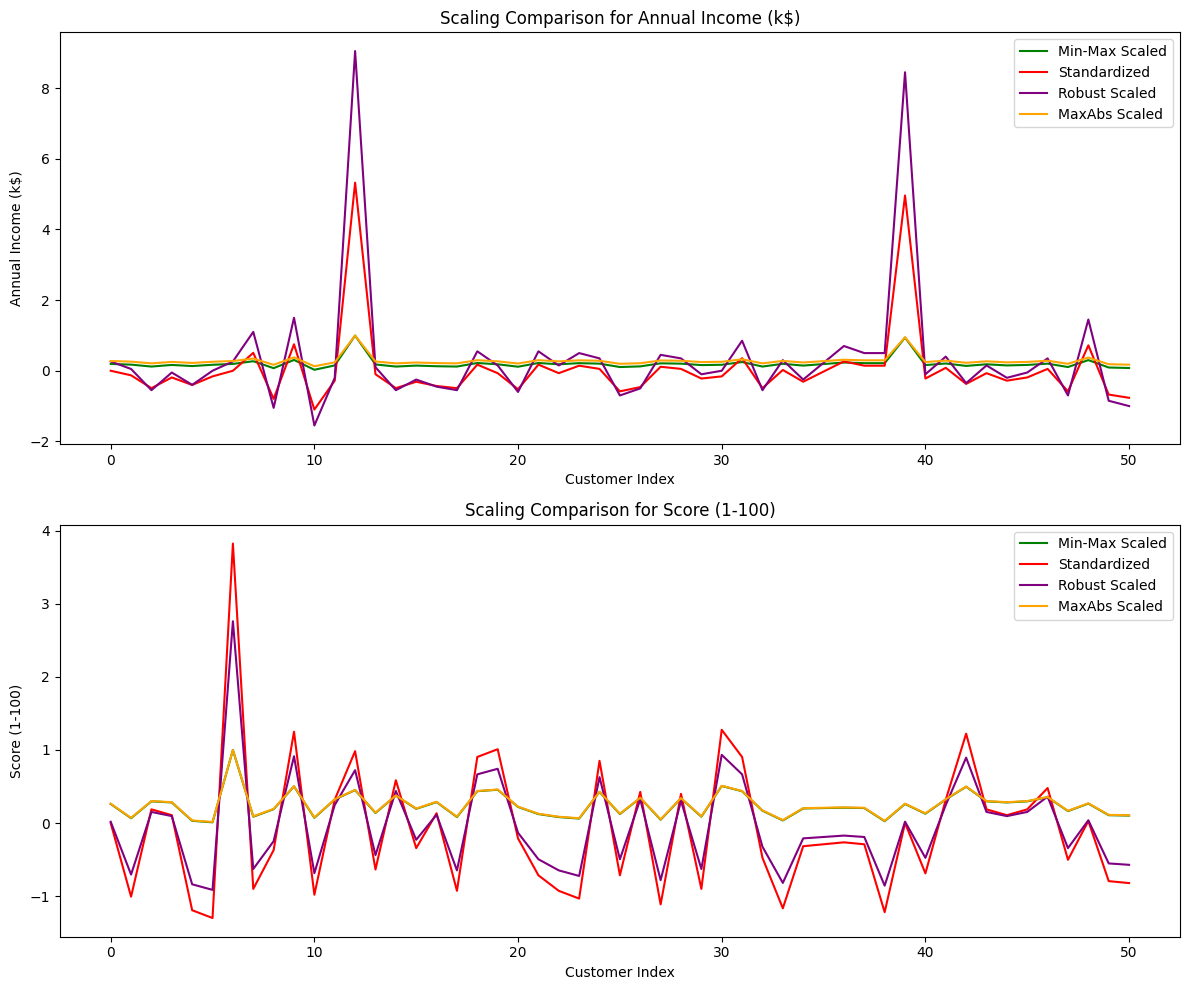

In [ ]:
# Plotting
samples=50
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for "Annual Income (k$)"
# Convert index to a list for numerical plotting
x_values = list(customers_encoded.index[:samples])
# axs[0].plot(x_values, customers_encoded['Annual Income (k$)'], label='Original', color='blue')
axs[0].plot(x_values, customers_min_max_scaled['Annual Income (k$)'][:samples], label='Min-Max Scaled', color='green')
axs[0].plot(x_values, customers_standard_scaled['Annual Income (k$)'][:samples], label='Standardized', color='red')
axs[0].plot(x_values, customers_robust_scaled['Annual Income (k$)'][:samples], label='Robust Scaled', color='purple')
axs[0].plot(x_values, customers_max_abs_scaled['Annual Income (k$)'][:samples], label='MaxAbs Scaled', color='orange')
axs[0].set_title('Scaling Comparison for Annual Income (k$)')
axs[0].set_xlabel('Customer Index')
axs[0].set_ylabel('Annual Income (k$)')
axs[0].legend()

# Plot for "Score (1-100)"
# axs[1].plot(x_values, customers_encoded['Score (1-100)'], label='Original', color='blue')
axs[1].plot(x_values, customers_min_max_scaled['Score (1-100)'][:samples], label='Min-Max Scaled', color='green')
axs[1].plot(x_values, customers_standard_scaled['Score (1-100)'][:samples], label='Standardized', color='red')
axs[1].plot(x_values, customers_robust_scaled['Score (1-100)'][:samples], label='Robust Scaled', color='purple')
axs[1].plot(x_values, customers_max_abs_scaled['Score (1-100)'][:samples], label='MaxAbs Scaled', color='orange')
axs[1].set_title('Scaling Comparison for Score (1-100)')
axs[1].set_xlabel('Customer Index')
axs[1].set_ylabel('Score (1-100)')
axs[1].legend()

plt.tight_layout()
plt.show()

**Step 5: Remove Outliers**

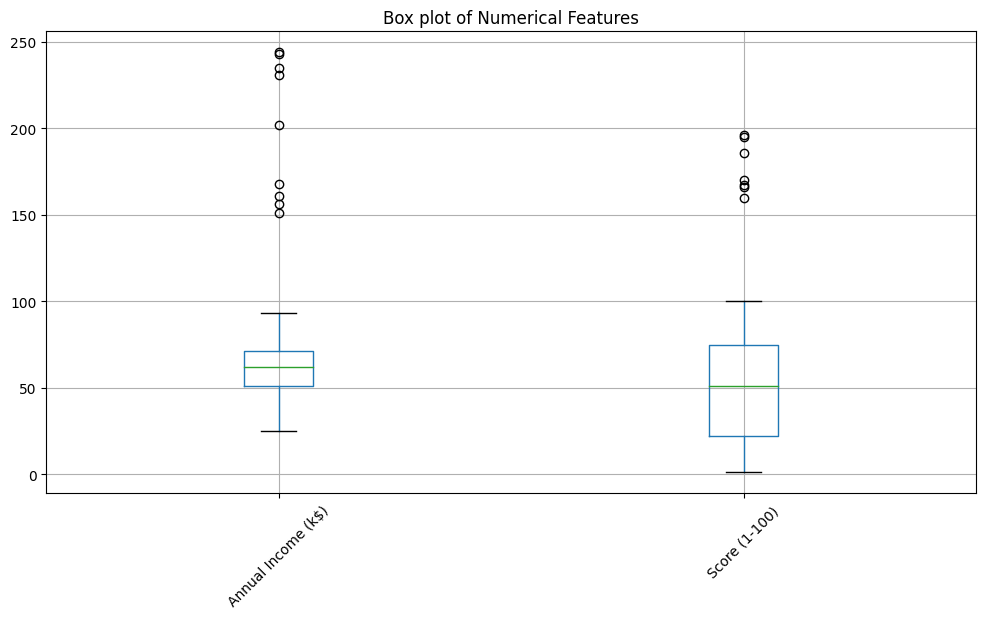

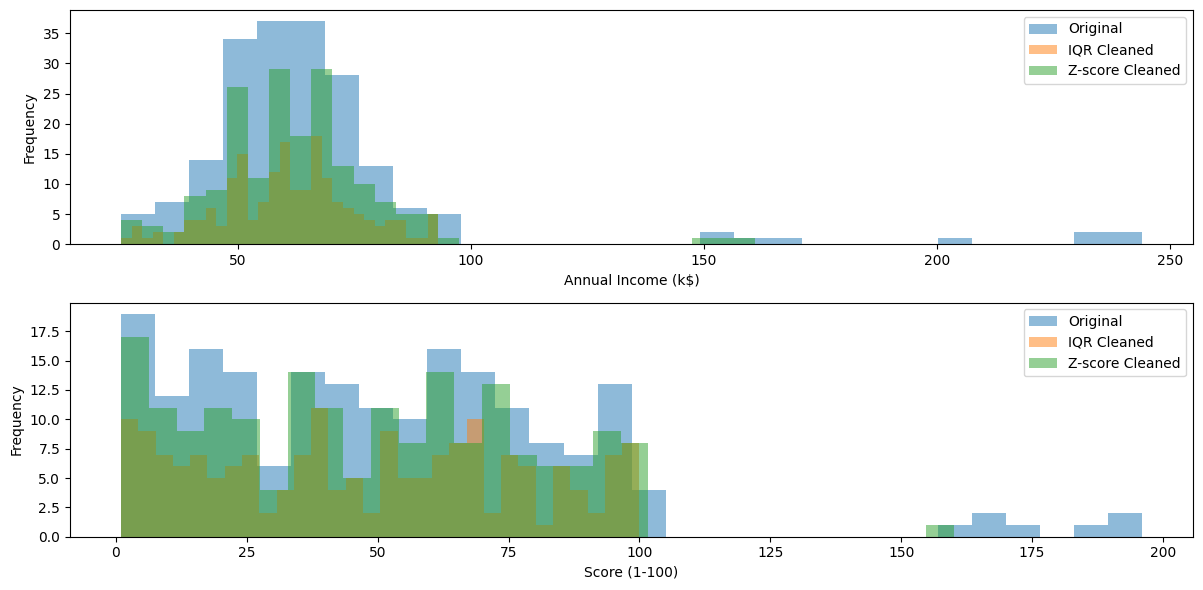

Cleaned datasets saved to 'customers_iqr_cleaned.csv' and 'customers_zscore_cleaned.csv'
Customer information after Removing Outliers
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 200
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         183 non-null    object 
 1   Gender              183 non-null    int64  
 2   Age                 183 non-null    object 
 3   Annual Income (k$)  183 non-null    float64
 4   Score (1-100)       183 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 200
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         179 non-null    object 
 1   Gender              179 non-null    int64  
 2   Age                 179 non-null    object 
 3   Annual Income

In [ ]:
from scipy import stats # Import the stats module from scipy
# Identify numerical columns (excluding 'Gender' which is categorical despite encoding)
numerical_features = customers_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Gender')  # Remove 'Gender' from the list

# Step 1: Identify Outliers
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
customers_encoded[numerical_features].boxplot() # Use the updated numerical_features
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Step 2: Remove Outliers using IQR and Z-score methods
# IQR Method
Q1 = customers_encoded[numerical_features].quantile(0.25)
Q3 = customers_encoded[numerical_features].quantile(0.75)
IQR = Q3 - Q1
# Use the correct DataFrame 'customers_encoded' consistently
customers_iqr_cleaned = customers_encoded[~((customers_encoded[numerical_features] < (Q1 - 1.5 * IQR)) | (customers_encoded[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Z-score Method
z_scores = np.abs(stats.zscore(customers_encoded[numerical_features])) # Use the updated numerical_features
threshold = 3 # Adjust the threshold as needed
customers_zscore_cleaned = customers_encoded[(z_scores < threshold).all(axis=1)]

# Step 3: Comparison - Histograms
plt.figure(figsize=(12, 6))

for i, feature in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features)//2, i + 1)
    plt.hist(customers_encoded[feature], bins=30, alpha=0.5, label='Original')
    plt.hist(customers_iqr_cleaned[feature], bins=30, alpha=0.5, label='IQR Cleaned')
    plt.hist(customers_zscore_cleaned[feature], bins=30, alpha=0.5, label='Z-score Cleaned')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

# Step 4: Save Cleaned Data
customers_iqr_cleaned.to_csv('customers_iqr_cleaned.csv', index=False)
customers_zscore_cleaned.to_csv('customers_zscore_cleaned.csv', index=False)

print("Cleaned datasets saved to 'customers_iqr_cleaned.csv' and 'customers_zscore_cleaned.csv'")
print("Customer information after Removing Outliers")
customers_zscore_cleaned.info()
customers_iqr_cleaned.info()


**Step 6: Apply Feature Scaling Techniques After Removing Outliers by IQR**

Original Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
1            1    Male   39                63.0           14.0
2            2  Female   35                51.0           59.0
3            3    Male   39                61.0           56.0
4            4    Male   18                54.0            7.0

Min-Max Scaled Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age            0.621622       0.514475
1            1       2   39            0.558824       0.131313
2            2       0   35            0.382353       0.585859
3            3       2   39            0.529412       0.555556
4            4       2   18            0.426471       0.060606

Standardized Dataset:
    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0  Customer ID       1  Age            0.445431       0.151613
1            1       2   39            0.137848  

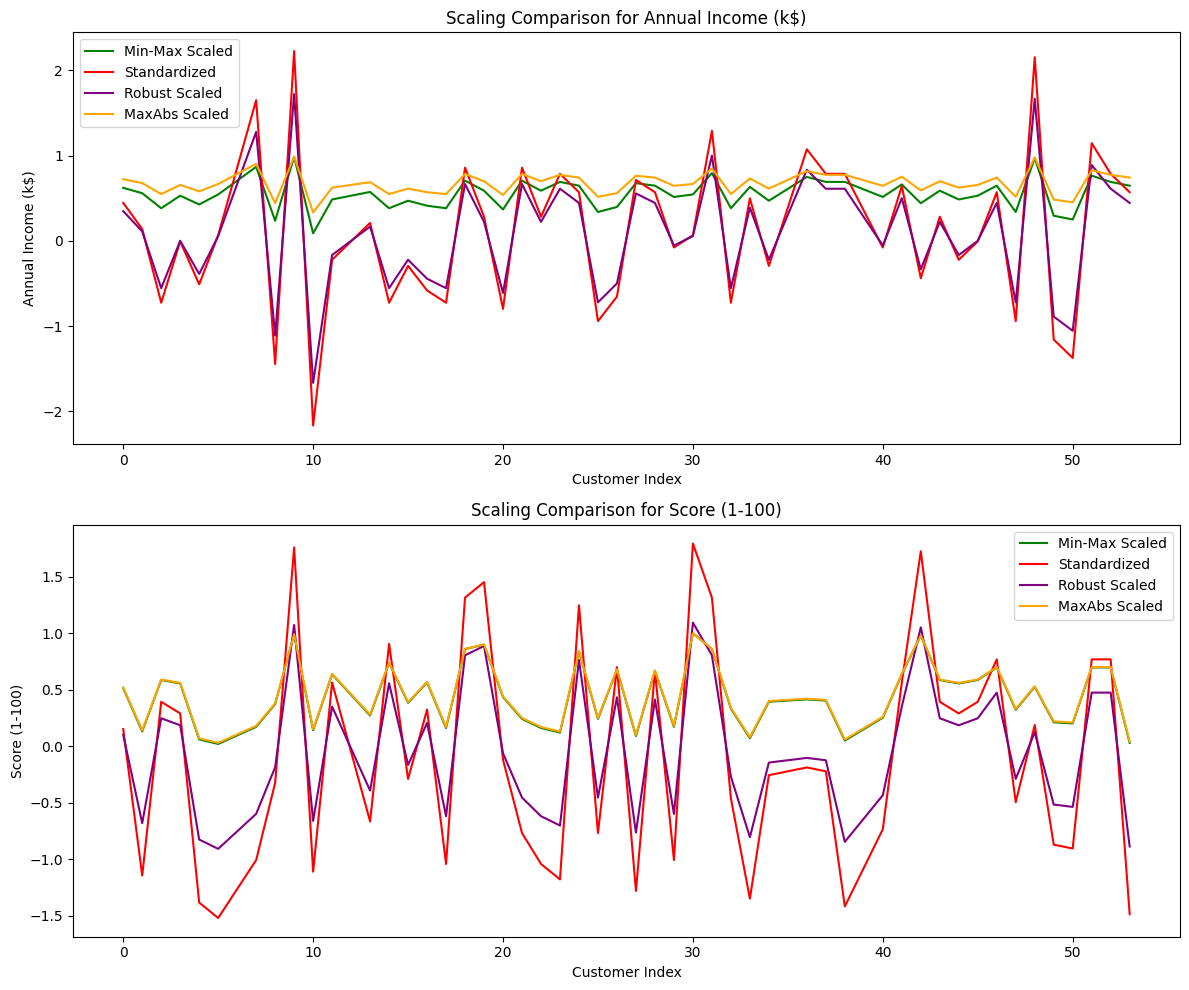

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Separate the features for scaling, EXCLUDING the header
features = customers_iqr_cleaned[['Annual Income (k$)', 'Score (1-100)']].values

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
features_min_max_scaled = min_max_scaler.fit_transform(features)
customers_min_max_scaled = customers_iqr_cleaned.copy()
customers_min_max_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_min_max_scaled

# Standardization
standard_scaler = StandardScaler()
features_standard_scaled = standard_scaler.fit_transform(features)
customers_standard_scaled = customers_iqr_cleaned.copy()
customers_standard_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_standard_scaled

# Robust Scaling
robust_scaler = RobustScaler()
features_robust_scaled = robust_scaler.fit_transform(features)
customers_robust_scaled = customers_iqr_cleaned.copy()
customers_robust_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_robust_scaled

# MaxAbs Scaling
max_abs_scaler = MaxAbsScaler()
features_max_abs_scaled = max_abs_scaler.fit_transform(features)
customers_max_abs_scaled = customers_iqr_cleaned.copy()
customers_max_abs_scaled[['Annual Income (k$)', 'Score (1-100)']] = features_max_abs_scaled

# Display the scaled datasets
print("Original Dataset:\n", customers.head())
print("\nMin-Max Scaled Dataset:\n", customers_min_max_scaled.head())
print("\nStandardized Dataset:\n", customers_standard_scaled.head())
print("\nRobust Scaled Dataset:\n", customers_robust_scaled.head())
print("\nMaxAbs Scaled Dataset:\n", customers_max_abs_scaled.head())

# Save the encoded datasets to new CSV files
customers_min_max_scaled.to_csv('min_max_scaled_customers.csv', index=False)
customers_standard_scaled.to_csv('standard_scaled_customers.csv', index=False)
customers_robust_scaled.to_csv('robust_scaled_customers.csv', index=False)
customers_max_abs_scaled.to_csv('max_abs_scaled_customers.csv', index=False)

print("\nScaled datasets saved to CSV files.")

# Plotting
samples=50
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot for "Annual Income (k$)"
# Convert index to a list for numerical plotting
x_values = list(customers_iqr_cleaned.index[:samples])
# axs[0].plot(x_values, customers_encoded['Annual Income (k$)'], label='Original', color='blue')
axs[0].plot(x_values, customers_min_max_scaled['Annual Income (k$)'][:samples], label='Min-Max Scaled', color='green')
axs[0].plot(x_values, customers_standard_scaled['Annual Income (k$)'][:samples], label='Standardized', color='red')
axs[0].plot(x_values, customers_robust_scaled['Annual Income (k$)'][:samples], label='Robust Scaled', color='purple')
axs[0].plot(x_values, customers_max_abs_scaled['Annual Income (k$)'][:samples], label='MaxAbs Scaled', color='orange')
axs[0].set_title('Scaling Comparison for Annual Income (k$)')
axs[0].set_xlabel('Customer Index')
axs[0].set_ylabel('Annual Income (k$)')
axs[0].legend()

# Plot for "Score (1-100)"
# axs[1].plot(x_values, customers_encoded['Score (1-100)'], label='Original', color='blue')
axs[1].plot(x_values, customers_min_max_scaled['Score (1-100)'][:samples], label='Min-Max Scaled', color='green')
axs[1].plot(x_values, customers_standard_scaled['Score (1-100)'][:samples], label='Standardized', color='red')
axs[1].plot(x_values, customers_robust_scaled['Score (1-100)'][:samples], label='Robust Scaled', color='purple')
axs[1].plot(x_values, customers_max_abs_scaled['Score (1-100)'][:samples], label='MaxAbs Scaled', color='orange')
axs[1].set_title('Scaling Comparison for Score (1-100)')
axs[1].set_xlabel('Customer Index')
axs[1].set_ylabel('Score (1-100)')
axs[1].legend()

plt.tight_layout()
plt.show()

**Practice:**

**1- Handling Missing Values:**
Choose two columns: one numerical (e.g., Annual Income) and one categorical (e.g., Gender). Impute missing values 1- in the chosen numerical column using the Backward Fill and 2- in the chosen categorical column using the mode.

**2- Encoding Categorical Variables:** Choose one categorical feature with a small number of unique values (e.g., Gender with "Male" and "Female"). Apply one-hot encoding and explain the changes it introduces.

**3- Feature Scaling:** Choose one numerical feature (Age) that might have different scales. Apply Min-Max scaling and Standard scaling to the chosen feature and compare the resulting distributions using histograms. Explain the differences between the two scaling methods.

**4- Remove Outliers:** Choose